### Pratica parcial 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Algoritmos adaptativos Adams/multon-bashford
Se intentara recrear el recorrdio de vanderpol con grado 4 en bashfrod y grado 5 en multon



In [2]:
def System(r,t,mu=1.5): #Se ajustan los argumentos dentro de la funcion systema para ahorra tiempo de programacion
                        # Y tambien para evitar que se ueda olvidar en las futuras funciones                  
    x= r[0]
    vx=r[1]
    dxdt = vx
    dvxdt = mu*(1-x**2)*vx - x

    return np.array([dxdt,dvxdt])

def Rungekutta(f,r0,t,grado=4):
    
    h= t[1]-t[0]
    x=np.zeros_like(t)
    vx=np.zeros_like(t)

    x[0]=r0[0]
    vx[0]=r0[1]

    K1=np.zeros(len(r0))
    K2=np.zeros(len(r0))
    K3=np.zeros(len(r0))
    K4=np.zeros(len(r0))
    
    
    if grado!=0:
        
        for i in range(1,grado):

            R=np.array(([x[i-1],vx[i-1]])) #Recordemos que en el vector R van las variables dependientes yn
            K1=f(R,t) 
            
            R=np.array(([x[i-1]+0.5*h*K1[0],vx[i-1]*0.5*h*K1[1]]))
            K2=f(R,t[i-1]+0.5*h)
            
            R=np.array(([x[i-1]+0.5*h*K2[0],vx[i-1]*0.5*h*K2[1]]))
            K3=f(R,t[i-1]+0.5*h)
            
            R=np.array(([x[i-1]+h*K3[0],vx[i-1]*0.5*h*K3[1]]))
            K4=f(R,t[i-1]+h)
            
            x[i]=x[i-1] + (h*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0]))/6
            vx[i]=vx[i-1] + (h*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1]))/6
            
    else: 
        for i in range(1,len(t)):
            
            a=x[i-1] # x en el valor presente
            b=vx[i-1] # velocidad en el valor presente
            
            R=np.array(([a,b])) #Recordemos que en el vector R van las variables dependientes yn
            K1=f(R,t) 
            
            R=np.array(([a+0.5*h*K1[0],b+0.5*h*K1[1]]))
            K2=f(R,t[i-1]+0.5*h)
            
            R=np.array(([a+0.5*h*K2[0],b+0.5*h*K2[1]]))
            K3=f(R,t[i-1]+0.5*h)
            
            R=np.array(([a+h*K3[0],b+ h*K3[1]]))
            K4=f(R,t[i-1]+h)
            
            x[i]=x[i-1] + (h*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0]))/6
            vx[i]=vx[i-1] + (h*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1]))/6
        
    return x,vx

def adamsmethod(f,r0,t,grado=4):
    
    x,vx=Rungekutta(f,r0,t,grado=4)
    
    h= t[1] -t[0]
    x_bash=x.copy() # x bashford
    vx_bash=vx.copy() # vx bashford
    
    x_mul=x.copy() # x multon
    vx_mul=vx.copy() # vx multon
    
    for i in range(grado,len(t)):
        
        #  Adam bashford de orden 4
        
        R=np.array([x_bash[i-1],vx_bash[i-1]])
        f1_b=55*f(R,t)
        
        R=np.array([x_bash[i-2],vx_bash[i-2]])
        f2_b=-59*f(R,t)
        
        R=np.array([x_bash[i-3],vx_bash[i-3]])
        f3_b=37*f(R,t)
        
        R=np.array([x_bash[i-4],vx_bash[i-4]])
        
        f4_b=-9*f(R,t)
        
        summ=f1_b + f2_b + f3_b + f4_b
        
        x_bash[i] = x_bash[i-1] + (h/24)*summ[0]
        vx_bash[i] = vx_bash[i-1] + (h/24)*summ[1]
        
        # Adam multon de orden 5
        
        f1_m=251*f([x_bash[i],vx_bash[i]],t)
        f2_m=646*f([x_bash[i-1],vx_bash[i-1]],t)
        f3_m=-264*f([x_bash[i-2],vx_bash[i-2]],t)
        f4_m=106*f([x_bash[i-3],vx_bash[i-3]],t)
        f5_m=-19*f([x_bash[i-4],vx_bash[i-4]],t)
        summ_m=f1_m+f2_m+f3_m+f4_m+f5_m
        x_mul[i]= x_mul[i-1] + (h/720)*summ_m[0]
        vx_mul[i]= vx_mul[i-1] + (h/720)*summ_m[1]  
        
    return x_bash,vx_bash,x_mul,vx_mul



In [3]:
t = np.linspace(0,20,10000)
r0 = [0.5,0.]
sol= adamsmethod(System,r0,t) # [x_bash,vx_bash,x_mul,vx_mul]

solR=Rungekutta(System,r0,t,grado=0)


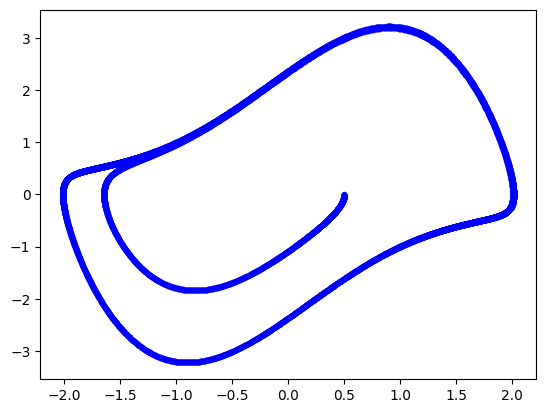

In [4]:
#plt.scatter(solR[0],solR[1],color='red',marker='.')
plt.scatter(sol[2],sol[3],color='blue',marker='.')

In [5]:
a=np.array([1,2,3])
a.shape[0]

3

### Paso adaptativo

In [21]:
def increment(f,r0,t,h):
    x=r0[0]
    v=r0[1]
    
    R=np.array(([x,v])) #Recordemos que en el vector R van las variables dependientes yn
    K1=f(R,t) 
    
    R=np.array(([x+0.5*h*K1[0],v+0.5*h*K1[1]]))
    K2=f(R,t+0.5*h)
    
    R=np.array(([x+0.5*h*K2[0],v+0.5*h*K2[1]]))
    K3=f(R,t+0.5*h)
    
    R=np.array(([x+h*K3[0],v+ h*K3[1]]))
    K4=f(R,t+h)
    
    Delta=(h*(K1 + 2*K2 + 2*K3 + K4))/6
    
    return r0+Delta


def checkpasos(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia=0.001
    Delta1=np.abs(Delta1) # D1 -> h
    Delta2=np.abs(Delta2) # D2 ->1.5*h
    Delta3=np.abs(Delta3) # D3 -> 0.3*h

    
    if Delta1 < tolerancia:
        
        dx=Delta1
        h=minimo
    else: 
        if np.abs((Delta1-Delta2))/Delta1 > maximo:
            dx=Delta2
            h=0.3*h
            
        if np.abs((Delta1-Delta3))/Delta1 < minimo:
            dx=Delta3
            h=1.5*h
            
        else: 
            dx=Delta1
            h=h
            
    return dx,h

def adaptativo(f,r0,t):
    
    h=t[1]-t[0]
    
    tf =t[-1]
    t2=t[0]
    
    r=r0
    
    Tiempo= np.array([t2])
    Pasos=np.array([h])
    vector=r
    
    while t2 < tf: 
        
        Delta1 = increment(f,r,t2,h)
        Delta2 = increment(f,r,t2,0.5*h)
        Delta3 = increment(f,r,t2,2*h)
        
        Deltas = Delta1.copy()
        ht = Delta1.copy()
        
        for i in range(Delta1.shape[0]):
            Deltas[i],ht[i] = checkpasos(Delta1[i],Delta2[i],Delta3[i],h)
            
        h=np.mean(ht)
        
        t2+=h
        
        r=increment(f,r,t2,h)
        
        Tiempo=np.append(Tiempo,t2)
        Pasos=np.append(Pasos,h)
        vector=np.vstack((vector,r))
        
        
    return Tiempo,Pasos,vector

 

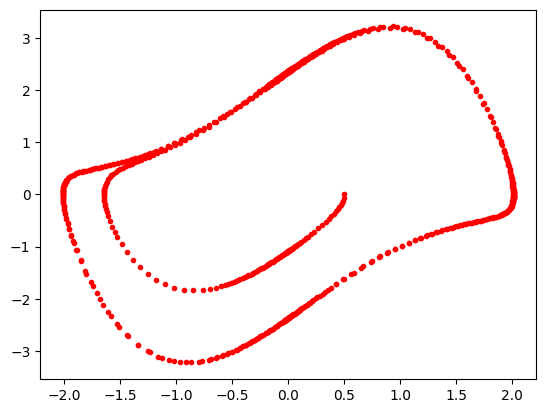

In [22]:
t = np.linspace(0,20,100)
r0 = np.array([0.5,0.])

t1,p,x1=adaptativo(System,r0,t)

plt.scatter(x1[:,0],x1[:,1],color='red',marker='.')
